DATA BOOTCAMP MIDTERM


*   SAHIL MAISURIA SM8006
*  ALPER KAAN YANARATES AKY244






# Import modules and packages

*   List item
*   List item



In [ ]:
# import our modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates

# Load Dataset

In [ ]:
# importing our data set
URL = 'https://reveliolabs.s3.us-east-2.amazonaws.com/DB_MidtermSampleData_Oct21.csv'
master = pd.read_csv(URL,
                 encoding='utf8',
                 dtype="unicode",
                 parse_dates=True,
                 low_memory = False)

# Descriptive Statistics

In [ ]:
# get descriptive statistics of the dataframe
master.describe(include='O')

,company,sector,month,job_category,seniority,region,gender,count,inflow,outflow
count,3488760,3488760,3488760,3488760,3488760,3488760,3488760,3488760,3488760,3488760
unique,77,7,45,9,4,16,2,1539870,751617,762812
top,Procter & Gamble Co,Information Technology,2020-06,management,2,Northern America,female,0.0,0.0,0.0
freq,47520,860850,77528,443520,984060,228690,1744380,99902,2229169,2239078


# Check if NaNs exist

In [ ]:
# count nan values across columns
master.isna().sum()

company         0
sector          0
month           0
job_category    0
seniority       0
region          0
gender          0
count           0
inflow          0
outflow         0
dtype: int64

# Preliminary Analysis

In [ ]:
# first 10 observations
master.head(10)

,company,sector,month,job_category,seniority,region,gender,count,inflow,outflow
0,AT&T,Communication,2018-03,technician,1,Central America and the Caribbean,male,262.175936,0.0,0.032
1,AT&T,Communication,2020-06,technician,1,Central America and the Caribbean,male,248.128603,0.0,0.58
2,Abbott Laboratories,Health Care,2018-11,empty,2,Central America and the Caribbean,male,593.256694,7.827981,5.969806
3,AT&T,Communication,2021-02,scientist,2,Central America and the Caribbean,male,20.169032,0.0,0.0
4,Abbott Laboratories,Health Care,2018-01,management,4,Central America and the Caribbean,male,334.808099,5.978376,3.524392
5,Abbott Laboratories,Health Care,2018-12,management,4,Central America and the Caribbean,male,338.355188,2.180422,8.215726
6,Abbott Laboratories,Health Care,2021-04,management,4,Central America and the Caribbean,male,341.978636,1.754771,10.58286
7,AT&T,Communication,2019-06,marketing,2,Central and Western Asia,male,27.735992,0.0,0.0
8,AT&T,Communication,2021-03,marketing,2,Central and Western Asia,male,31.47885,0.0,0.0
9,AT&T,Communication,2021-05,marketing,2,Central and Western Asia,male,33.675832,2.196982,0.0


In [ ]:
# last 10 observations
master.tail(10)

,company,sector,month,job_category,seniority,region,gender,count,inflow,outflow
3488750,Oracle Corporation,Information Technology,2018-05,technician,1,Eastern Asia,female,10.528882,0.0,0.0
3488751,Oracle Corporation,Information Technology,2019-11,technician,1,Eastern Asia,female,10.528882,0.0,0.0
3488752,Oracle Corporation,Information Technology,2020-09,technician,1,Eastern Asia,female,10.528882,0.0,0.0
3488753,Oracle Corporation,Information Technology,2020-10,technician,1,Eastern Asia,female,10.528882,0.0,0.0
3488754,Nestle SA,Consumer Staples,2019-05,management,3,Central and Western Asia,female,75.845541,0.0,0.0
3488755,The Boeing Company,Industrials,2019-11,marketing,3,Northern Africa,female,0.001,0.0,0.0
3488756,"Delta Air Lines, Inc.",Industrials,2019-02,management,4,Pacific Islands,male,5.804392,0.0,0.0
3488757,"Delta Air Lines, Inc.",Industrials,2020-03,management,4,Pacific Islands,male,5.804392,0.0,0.0
3488758,Barclays PLC,Financials,2018-02,administrative,4,Sub-Saharan Africa,male,40.141743,0.0,0.0
3488759,Wells Fargo & Company,Financials,2018-06,engineer,2,Western Europe,female,40.534,0.0,0.0


In [ ]:
# check the datatypes
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488760 entries, 0 to 3488759
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   company       object
 1   sector        object
 2   month         object
 3   job_category  object
 4   seniority     object
 5   region        object
 6   gender        object
 7   count         object
 8   inflow        object
 9   outflow       object
dtypes: object(10)
memory usage: 266.2+ MB


# Data Conversions

In [ ]:
#Not all variables are defined in an appropriate format, hence we altered their types to be able to conduct our analysis.
master['month'] = pd.to_datetime(master['month'])
master['seniority']= master['seniority'].astype('int')
master["count"] = pd.to_numeric(master["count"])
master["inflow"] = pd.to_numeric(master["inflow"], )
master['outflow'] = pd.to_numeric(master['outflow'])
master['gender'] = pd.Categorical(master['gender'])
master.dtypes

company                 object
sector                  object
month           datetime64[ns]
job_category            object
seniority                int64
region                  object
gender                category
count                  float64
inflow                 float64
outflow                float64
dtype: object

In [ ]:
# a column for net flows
master['net_flows'] = master['inflow'] - master['outflow']
master['net_flows']

0         -0.032000
1         -0.580000
2          1.858175
3          0.000000
4          2.453984
             ...   
3488755    0.000000
3488756    0.000000
3488757    0.000000
3488758    0.000000
3488759    0.000000
Name: net_flows, Length: 3488760, dtype: float64

## Requirements
* This project is intended to be open ended. 
* Comprehensive use of python code & concepts learned over the semester thus far (30%)
* Depth of project analysis, i.e. how many scenarios/“experiments” did you test (30%)

In [ ]:
# All the columns that we have
master.columns

Index(['company', 'sector', 'month', 'job_category', 'seniority', 'region',
       'gender', 'count', 'inflow', 'outflow', 'net_flows'],
      dtype='object')

In [ ]:
# All the companies that we have
master['company'].value_counts().index

Index(['Procter & Gamble Co', 'Pfizer Inc', 'General Electric Company',
       'Siemens AG', 'GlaxoSmithKline PLC', 'Roche Holding AG',
       'MICROSOFT CORPORATION', 'Unilever NV', 'Abbott Laboratories',
       'Novartis AG', 'Johnson & Johnson', 'Ford Motor Company', 'Nestle SA',
       'Bayer AG', 'United Technologies Corporation', 'Dell Technologies Inc',
       'PepsiCo, Inc.', 'Merck & Co., Inc.',
       'International Business Machines Corporation', 'Coca-Cola Company',
       'Amazon.com, Inc.', 'Honeywell International Inc', 'Apple, Inc.',
       'ABB Ltd', 'Medtronic PLC', 'Oracle Corporation', 'Citigroup Inc',
       'GENERAL MOTORS COMPANY', 'Walt Disney Company', 'Alphabet Inc.',
       'Orange SA', 'HSBC Holdings PLC', 'Intel Corporation', 'HP Inc',
       'Toyota Motor Corp', 'CVS Health Corporation',
       'Hewlett Packard Enterprise Company', 'SAP SE', 'IQVIA',
       'Omnicom Group Inc', 'Tata Group', 'AT&T',
       'Verizon Communications Inc.', 'Volkswagen AG', 'B

# Let's look at Microsoft since it's the most valuable company in the world as of October 29th 2021.

In [ ]:
microsoft = master.loc[master['company']=='MICROSOFT CORPORATION'].sort_values(['company','month','seniority']) # sort values based on company name, month and seniority

# clean the rows 
microsoft.replace(["MICROSOFT CORPORATION"],
                 ["Microsoft"], inplace=True)

# drop the rows with empty job category
microsoft = microsoft.loc[(microsoft['job_category']!='empty')&
                          (microsoft['region']!='empty')]

# look at firt 20 observations
print(f"Length of the DataFrame is{len(microsoft)}")
microsoft.head(10)

Length of the DataFrame is43110


,company,sector,month,job_category,seniority,region,gender,count,inflow,outflow,net_flows
27479,Microsoft,Information Technology,2018-01-01,management,1,Central America and the Caribbean,male,640.373160,2.738104,0.845577,1.892527
28598,Microsoft,Information Technology,2018-01-01,management,1,Southern Asia,male,4648.221611,59.350593,22.057320,37.293273
34742,Microsoft,Information Technology,2018-01-01,finance,1,Arab States,male,292.297531,0.931000,1.126000,-0.195000
53456,Microsoft,Information Technology,2018-01-01,scientist,1,Southern Asia,female,502.057356,11.454586,1.327000,10.127586
103782,Microsoft,Information Technology,2018-01-01,scientist,1,Southern Europe,female,138.041021,0.000000,0.000000,0.000000
107964,Microsoft,Information Technology,2018-01-01,marketing,1,Southern Europe,female,116.025947,2.968000,1.222000,1.746000
123259,Microsoft,Information Technology,2018-01-01,engineer,1,Central America and the Caribbean,female,265.399863,2.274000,0.011000,2.263000
163760,Microsoft,Information Technology,2018-01-01,finance,1,Central and Western Asia,male,84.162522,1.559000,0.000000,1.559000
184981,Microsoft,Information Technology,2018-01-01,technician,1,Arab States,male,180.537374,0.001000,0.000000,0.001000
192084,Microsoft,Information Technology,2018-01-01,scientist,1,Eastern Asia,male,272.802180,15.847794,18.446819,-2.599025


In [ ]:
# we have monthly values all the way from January 2018 to September 2021
microsoft['month'].value_counts().index.sort_values()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# how many job_categories do we have
microsoft['job_category'].value_counts()

scientist         5400
sales             5400
engineer          5400
administrative    5400
finance           5400
marketing         5400
management        5400
technician        5310
Name: job_category, dtype: int64

## Mean Inflow and Outflow

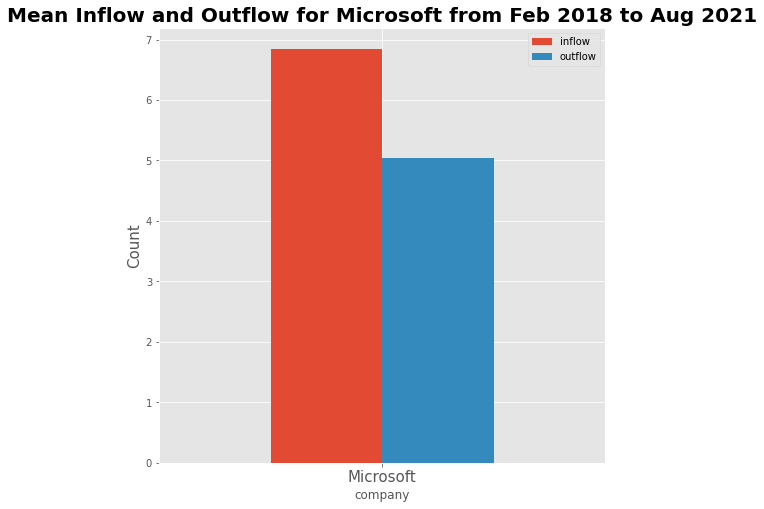

In [ ]:
fig,ax = plt.subplots() # subplots tuple object
microsoft.groupby('company')[['inflow','outflow']].mean().plot.bar(ax=ax,figsize=(8,8))
ax.set_title('Mean Inflow and Outflow for Microsoft from Feb 2018 to Aug 2021',size=20,loc='center',fontweight = 'bold') # title
ax.set_ylabel('Count',size=15) # y label
ax.tick_params(axis='x', labelrotation=360,labelsize=15)

This graph indicates that the number of employees who joined Microsoft between February 2018 and August 2021 is greater than those who left the company. Meaning Microsoft has a positive net-flow of employees. 

## The mean count levels for Microsoft across job categories, seniority levels and gender

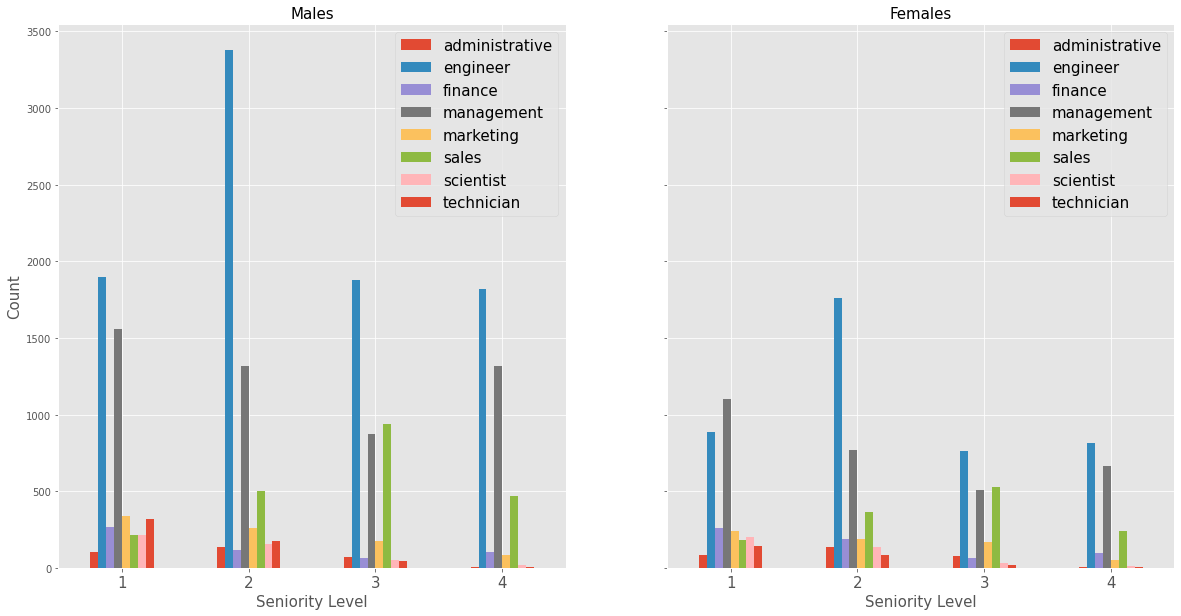

In [ ]:
df = pd.DataFrame(data = microsoft.groupby(['seniority','job_category','gender']).mean()['count'])
df.reset_index(inplace =True) # need to reset index otherwise we get a multi-index

males = df.loc[df['gender']=='male'] # get all rows with males
females = df.loc[df['gender']=='female'] # get all rows with females

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(20,10))
males.pivot('seniority','job_category','count').plot.bar(ax=ax[0]) # male data
females.pivot('seniority','job_category','count').plot.bar(ax=ax[1]) # female data

ax[0].set_title('Males',size=15)
ax[1].set_title('Females',size=15)

for i in range(2): # for each graph
    ax[i].set_ylabel('Count',size=15) # y label
    ax[i].set_xlabel('Seniority Level',size=15) # x label
    ax[i].tick_params(axis='x', labelrotation=360,labelsize=15) # x ticks
    ax[i].legend(fontsize=15) # legend

Percentage of Microsoft Employees Based on Region of Operation


For our analysis, we aspire to investigate the distribution of factors such as seniority, gender, and job category within Microsoft. These initial graphs allow us to make some general observations. These general observations will allow us to decide what kind of path to pursue as we conduct our analysis.

Broad observations:
*   Overall there are more males employed by Microsoft than females.
*   It seems, the most crowded seniority level is the second tier.
*   Most common job category at Microsoft is engineering followed by management.



# Distribution of Microsoft Employees by Region

Text(0, 0.5, '')

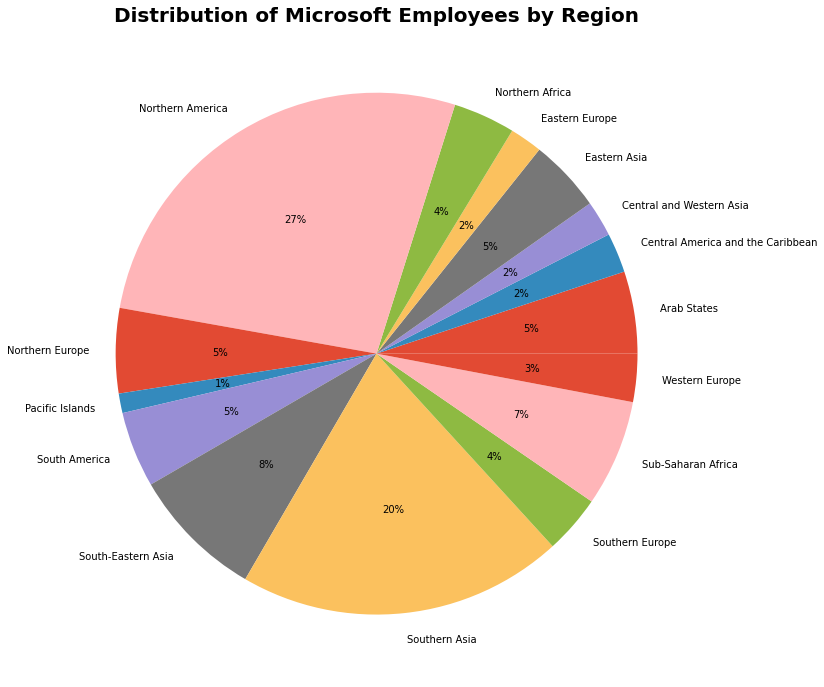

In [ ]:
temp = microsoft.loc[(microsoft['month']== microsoft['month'].max()) & (microsoft['seniority']== 1)] # for the last month in the dataset
temp.set_index('region',inplace=True) # set index to region

fig,ax = plt.subplots() # subplots tuple object
temp.groupby('region')["count"].median().plot.pie(ax=ax,figsize=(22,12), autopct='%1.0f%%') # bar chart
ax.set_title('Distribution of Microsoft Employees by Region',size=20,loc='center',fontweight = 'bold') # title
plt.ylabel("")

This is a pie chart which allows us to see the distribution of Microsoft employees across different regions. The data for concentration used in this distribution is the mean of all years. Some observations:

*   Microsoft's largest geographic presence by number of employees is in North America followed by Southern Asia and South-Eastern Asia. 
This is quite surprising, as one would expect a greater presence within Western 
*   Only 3% of Microsoft's employees are based in Western Europe. This is quite surprising as one would expect a greater presence within this region due to economic weight of countries such as the United Kingdom, Germany, France etc. are three of the top 10 economies.
*   Microsoft's smallest geographic presence by number of employees is in the Pacific Islands, Eastern Europe, Central and Western Asia, Central America and the Caribbean etc.



# We will keep our scope of analyses to the Arab States, Western Europe, Northern America, and Southern Asia

## Engineering jobs in Northern America and Southern Asia Across Genders and Seniority Level

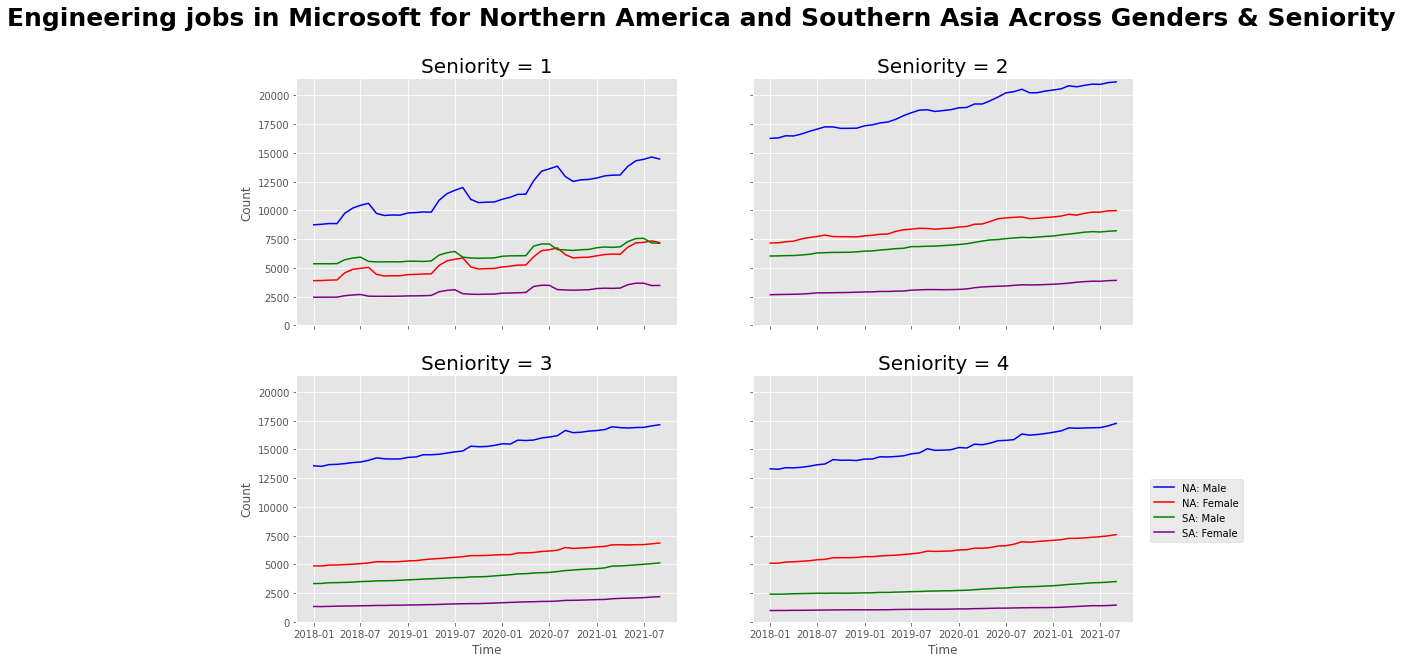

In [ ]:
temp = microsoft.loc[(microsoft['region'].isin(['Northern America','Southern Asia']))&
                    (microsoft['job_category']=='engineer'),:] # look at engineering jobs in NA and EUW
temp.set_index('month',inplace=True) # set month as index

# 4 graphs altogther
rows = 2
cols = 2

i = 1 # seniority level starting from 1
fig,ax = plt.subplots(rows,cols,sharex=True,figsize=(15,10)) # ax,fig object

# set super title
fig.suptitle('Engineering jobs in Microsoft for Northern America and Southern Asia Across Genders & Seniority',size = 25,fontweight = 'bold')

for r,row in enumerate(ax): # row 0,1
    for c,col in enumerate(row): # col 0,1
        ax[r, c].set_title('Seniority = '+ str(i),size=20)
        # Northern America
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Northern America") & (temp['gender']=='male'),'count'],color='b')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Northern America") & (temp['gender']=='female'),'count'],color='r')

        # Southern Asia
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Southern Asia") & (temp['gender']=='male'),'count'],color='g')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Southern Asia") & (temp['gender']=='female'),'count'],color='purple')

        i+=1
        if i==5:
            break

for ax in ax.flat:
    ax.set(xlabel='Time', ylabel='Count') # set labels
    ax.label_outer() # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.set_ylim([0,21500])
ax.legend(['NA: Male','NA: Female','SA: Male','SA: Female'],bbox_to_anchor = (1.3, 0.6))


Observations based on the graph above for Microsoft's operations in Western Europe and Southern Asia:

*   For all seniority levels, in both regions, the firm employs more males when compared to their female counterparts.
For all seniority levels, in both regions, 
*   In Southern Asia, the count difference between genders increases with the seniority level. While 
*   For seniority level 1, at the 7th month of every year, we can observe a bump in the number of employees for all genders across both regions. This is possibly because, Microsoft's first-year employees join the company in July.
*   For seniority levels 2, 3 and 4; It is possible to observe an increase in employment in across genders in Northern America. However such an employment bump is not visible for Southern Asian offices for the most part.







## Engineering jobs in Western Europe and Arab States Across Genders and Seniority Level

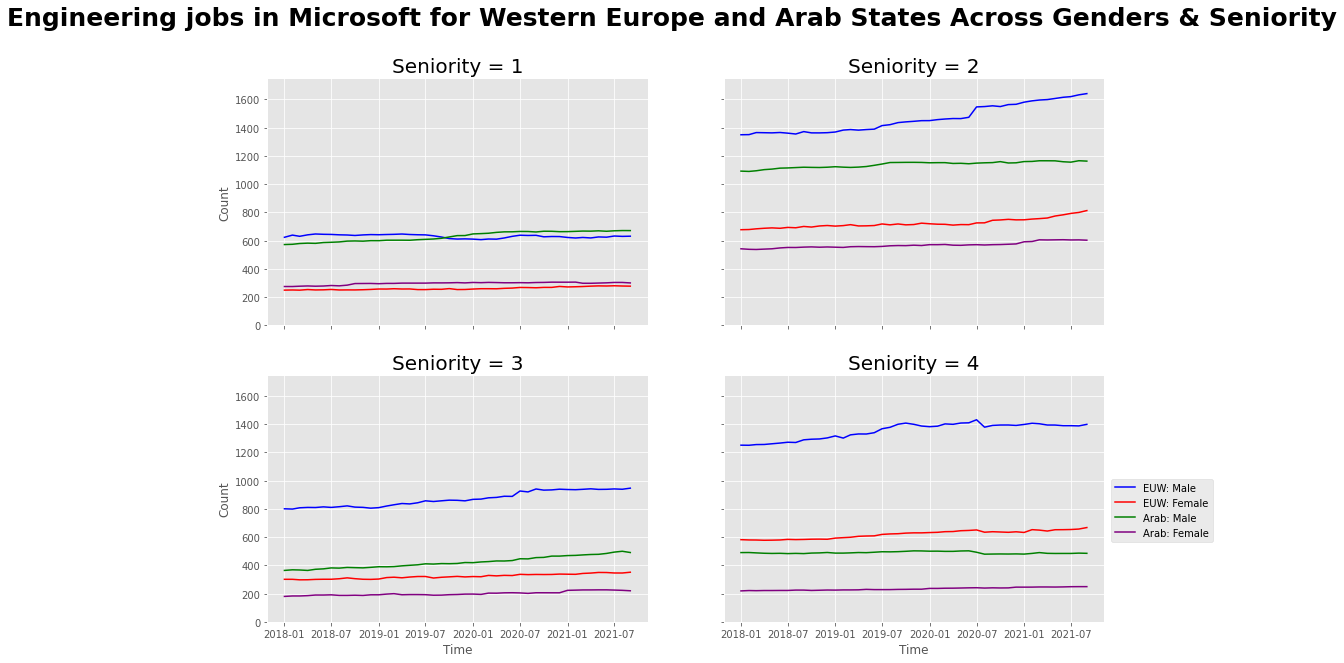

In [ ]:
temp = microsoft.loc[(microsoft['region'].isin(['Western Europe','Arab States']))&
                    (microsoft['job_category']=='engineer'),:] # look at engineering jobs in NA and EUW
temp.set_index('month',inplace=True) # set month as index

# 4 graphs altogther
rows = 2
cols = 2

i = 1 # seniority level starting from 1
fig,ax = plt.subplots(rows,cols,sharex=True,figsize=(15,10)) # ax,fig object

# set super title
fig.suptitle('Engineering jobs in Microsoft for Western Europe and Arab States Across Genders & Seniority',size = 25,fontweight = 'bold')

for r,row in enumerate(ax): # row 0,1
    for c,col in enumerate(row): # col 0,1
        ax[r, c].set_title('Seniority = '+ str(i),size=20)
        # Western Europe
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Western Europe") & (temp['gender']=='male'),'count'],color='b')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Western Europe") & (temp['gender']=='female'),'count'],color='r')

        # Arab States
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Arab States") & (temp['gender']=='male'),'count'],color='g')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Arab States") & (temp['gender']=='female'),'count'],color='purple')

        i+=1
        if i==5:
            break

for ax in ax.flat:
    ax.set(xlabel='Time', ylabel='Count') # set labels
    ax.label_outer() # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.set_ylim([0,1750])
ax.legend(['EUW: Male','EUW: Female','Arab: Male','Arab: Female'],bbox_to_anchor = (1.3, 0.6))

Observations based on the graph above for Microsoft's operations in Western Europe and Arab States:

*   For all seniority levels, in both regions, the firm employs more males when compared to their female counterparts.
*   For both regions the number of employees for seniority level 1 has remained relatively stagnant across both genders. This might indicate a lack of growth opportunities. 
*   For both regions, the gap between number of male and female employees for seniority level 1 is smaller than seniority level 2. This might indicate that the firm is trying to close the gap between genders for their entry-level hires. Or the firm might be having a harder time retaining female employees.
*   For seniority level 1 positions, the firm has hired approximately equal number of people for both regions across genders. However, the firm has significantly more employees in Western Europe than Arab States for any other seniority level. This might indicate either that the firm aims to increase its presence in the Arab States or it might be that the firm aims to maintain/lower its presence in Western Europe.







## Engineering jobs in South-Eastern Asia and Sub-Saharan Africa Across Genders and Seniority Level

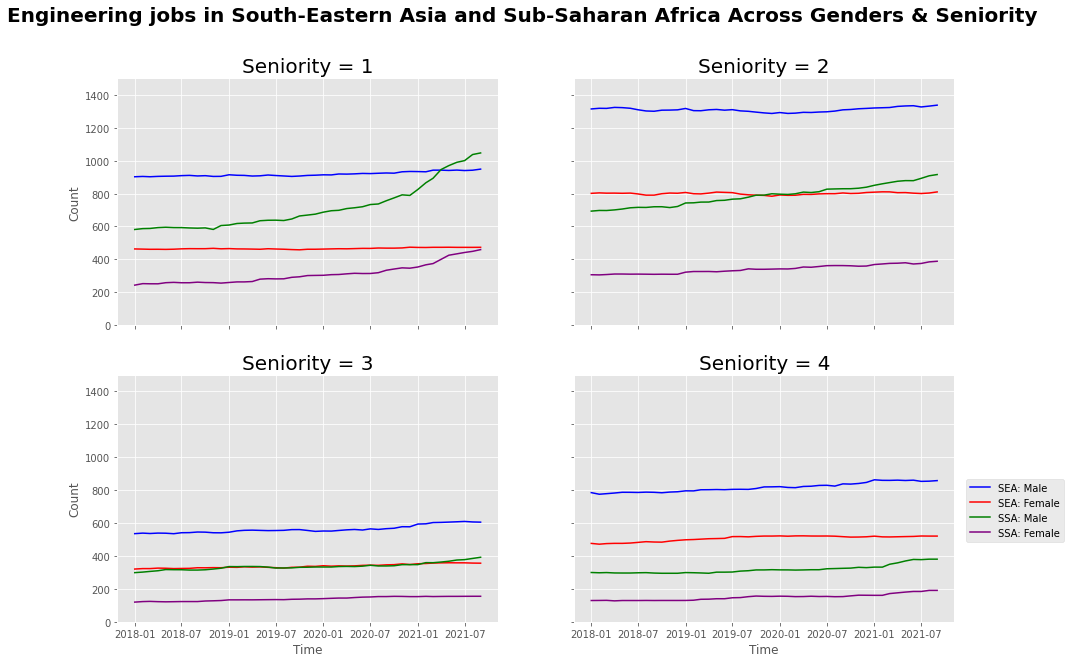

In [ ]:
temp = microsoft.loc[(microsoft['region'].isin(['South-Eastern Asia','Sub-Saharan Africa']))&
                    (microsoft['job_category']=='engineer'),:] # look at engineering jobs in NA and EUW
temp.set_index('month',inplace=True) # set month as index

# 4 graphs altogther
rows = 2
cols = 2

i = 1 # seniority level starting from 1
fig,ax = plt.subplots(rows,cols,sharex=True,figsize=(15,10)) # ax,fig object

# set super title
fig.suptitle('Engineering jobs in South-Eastern Asia and Sub-Saharan Africa Across Genders & Seniority',size = 20,fontweight = 'bold')

for r,row in enumerate(ax): # row 0,1
    for c,col in enumerate(row): # col 0,1
        ax[r, c].set_title('Seniority = '+ str(i),size=20)
        # South-Eastern Asia
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="South-Eastern Asia") & (temp['gender']=='male'),'count'],color='b')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="South-Eastern Asia") & (temp['gender']=='female'),'count'],color='r')

        # Sub-Saharan Africa
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Sub-Saharan Africa") & (temp['gender']=='male'),'count'],color='g')
        col.plot(temp.loc[(temp['seniority']==i) & (temp["region"]=="Sub-Saharan Africa") & (temp['gender']=='female'),'count'],color='purple')

        i+=1
        if i==5:
            break

for ax in ax.flat:
    ax.set(xlabel='Time', ylabel='Count') # set labels
    ax.label_outer() # Hide x labels and tick labels for top plots and y ticks for right plots.
    ax.set_ylim([0,1500])
ax.legend(['SEA: Male','SEA: Female','SSA: Male','SSA: Female'],bbox_to_anchor = (1.3, 0.6))

Observations based on the graph above for Microsoft's operations in Western Europe and Arab States:

*  For all seniority levels, in both regions, the firm employs more males when compared to their female counterparts.
*   For Sub-Saharan Africa, the number of entry-level positions show a very strong growth when compared to South-Eastern Asia. This indicates that Microsoft is specifically growing their operations in this region through increased hires.
*   The firm has around the same number of seniority level 1 employees in both regions. However, they have significantly more higher level employees in South-Eastern Asian region. This might be because the firm's operations in Sub-Saharan Africa are relatively newer when compared to South-Eastern Asia.





## Effect of COVID-19 on different job types in USA

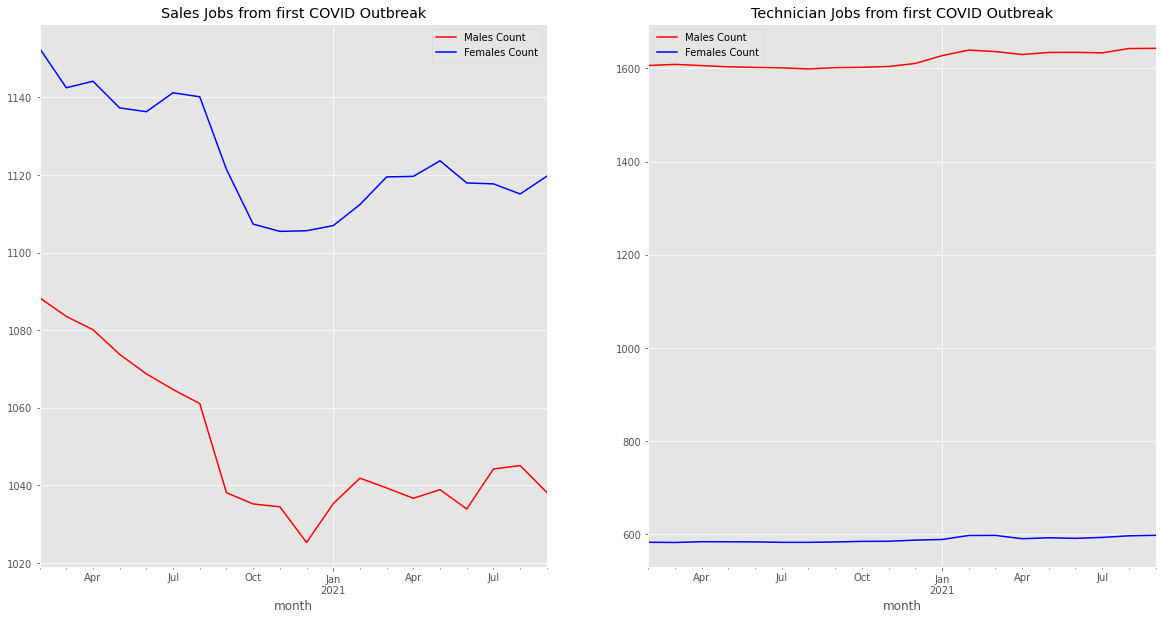

In [ ]:
start = '2020-01-20' # Jan 20, 2020
end = '2021-09-30' # September 30th 2021

# lets look at sales job for seniority level 1 across genders
temp = microsoft.loc[(microsoft['month'] > start) & (microsoft['month'] <= end)]

# sales jobs in NA with seniority = 1
temp = temp.loc[(temp['job_category']=='sales')&(temp['region']=='Northern America')&(temp['seniority']==1)]

males = temp.loc[temp['gender']=='male'] # get all rows with males
males.set_index('month',inplace = True)

females = temp.loc[temp['gender']=='female'] # get all rows with females
females.set_index('month',inplace = True)

fig,ax = plt.subplots(1,2,figsize=(20,10))
males['count'].plot.line(ax=ax[0],color='r')
females['count'].plot.line(ax=ax[0],color='b')
ax[0].set_title('Sales Jobs from first COVID Outbreak')
ax[0].legend(['Males Count','Females Count'])

start = '2020-01-20' # Jan 20, 2020
end = '2021-09-30' # September 30th 2021

# lets look at sales job for seniority level 1 across genders
temp = microsoft.loc[(microsoft['month'] > start) & (microsoft['month'] <= end)]

# technician jobs in NA with seniority = 1
temp = temp.loc[(temp['job_category']=='technician')&(temp['region']=='Northern America')&(temp['seniority']==1)]

males = temp.loc[temp['gender']=='male'] # get all rows with males
males.set_index('month',inplace = True)

females = temp.loc[temp['gender']=='female'] # get all rows with females
females.set_index('month',inplace = True)

males['count'].plot.line(ax=ax[1],color='r')
females['count'].plot.line(ax=ax[1],color='b')
ax[1].set_title('Technician Jobs from first COVID Outbreak')
ax[1].legend(['Males Count','Females Count'])

The graphs above indicate the number of male & female technicians Microsoft employed since the month World Health Organization (WHO) declared the covid-19 virus to be a pandemic. Here are some observations which we can make from these graphs:


*   The number of male & female technicians employed by Microsoft during this time remained stable.
*   The number of sales people employed by Microsoft have decreased by around 85 people. Around 50 of those sales persons are men which makes up around 4.5% of male sales persons. Around 35 of them are female which make up around 3.3% of sales persons. Overall these are very small numbers and possibly disregardable for an organization with the size of Microsoft.


